In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from quivr.utils import rewrite_program_postgres, str_to_program_postgres
import seaborn as sns

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Easy
budget: 30, # data: 200, f1_median: 0.699, f1_IQR: 0.21, f1_mean: 0.695, runtime_median: 600.0
budget: 50, # data: 200, f1_median: 0.997, f1_IQR: 0.039, f1_mean: 0.965, runtime_median: 885.0
budget: 100, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.985, runtime_median: 1516.0
Medium
budget: 30, # data: 200, f1_median: 0.533, f1_IQR: 0.273, f1_mean: 0.528, runtime_median: 592.0
budget: 50, # data: 200, f1_median: 0.843, f1_IQR: 0.39, f1_mean: 0.732, runtime_median: 904.0
budget: 100, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1556.0
Hard
budget: 30, # data: 200, f1_median: 0.466, f1_IQR: 0.251, f1_mean: 0.468, runtime_median: 541.0
budget: 50, # data: 200, f1_median: 0.642, f1_IQR: 0.401, f1_mean: 0.603, runtime_median: 808.0
budget: 100, # data: 200, f1_median: 0.67, f1_IQR: 0.442, f1_mean: 0.624, runtime_median: 1514.0


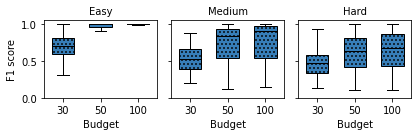

In [2]:
def plot_scene_graph():
    dataset_names = [
        "synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
    ]
    short_names = ["Easy", "Medium", "Hard"]
#     short_names = ["hard", "hard"]    
    fig, axs = plt.subplots(1, len(dataset_names), figsize = (6, 2))
    
    for dataset_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
        print(short_name)
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

        budgets = [30, 50, 100]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []

        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk")
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)

        f1_data = []
        runtime_data = []
        for x_idx, budget in enumerate(budgets):
            f1_slice = f1[:, x_idx]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            runtime_slice = runtime[:, x_idx]
            if np.all(runtime_slice == -1):
                runtime_slice = np.zeros_like(runtime_slice)
            else:
                runtime_slice[runtime_slice == -1] = np.nan
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            print("budget: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(budget, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[dataset_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
#         bp_runtime = axs[1, dataset_idx].boxplot(runtime_data, 
#                        positions=np.array(range(len(runtime_data))), 
#                        sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
#                        medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
#         handles_runtime.append(bp_runtime["boxes"][0])

        axs[dataset_idx].set(xlabel="Budget", ylabel="F1 score")
        axs[dataset_idx].set_ylim(bottom=0, top=1.05)
        axs[dataset_idx].set_xticks(range(0, len(budgets), 1), budgets)

#         axs[1, dataset_idx].set(xlabel="budget", ylabel="Time (s)")
#         axs[1, dataset_idx].set_xticks(range(0, len(budgets), 1), budgets)
        axs[dataset_idx].set_title(short_name, fontsize=10)
    for ax in axs.flat:
        ax.label_outer()
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/scene_graph_queries.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

plot_scene_graph()

Easy
init_example: 10, # data: 200, f1_median: 0.997, f1_IQR: 0.143, f1_mean: 0.863, runtime_median: 1434.0
init_example: 20, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.974, runtime_median: 1419.0
init_example: 30, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.985, runtime_median: 1516.0
init_example: 40, # data: 200, f1_median: 0.999, f1_IQR: 0.002, f1_mean: 0.991, runtime_median: 1350.0
init_example: 50, # data: 200, f1_median: 0.998, f1_IQR: 0.002, f1_mean: 0.995, runtime_median: 1256.0
Medium
init_example: 10, # data: 200, f1_median: 0.44, f1_IQR: 0.627, f1_mean: 0.495, runtime_median: 1416.0
init_example: 20, # data: 200, f1_median: 0.791, f1_IQR: 0.537, f1_mean: 0.677, runtime_median: 1450.0
init_example: 30, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1556.0
init_example: 40, # data: 200, f1_median: 0.938, f1_IQR: 0.245, f1_mean: 0.821, runtime_median: 1392.0
init_example: 50, # data: 200, f1_median: 0.956, f1_IQR: 0.153

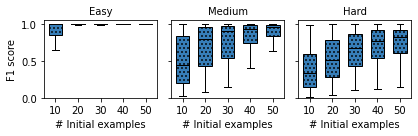

In [3]:
def vary_init_examples():
    dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                    ]
    
    short_names = ["Easy", "Medium", "Hard"]

    fig, axs = plt.subplots(1, len(dataset_names), figsize = (6, 2))

    init_examples = [5, 10, 15, 20, 25]

    for dataset_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
        print(short_name)
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
        handles_f1 = []
        handles_runtime = []
        legend_labels = []

        f1_data = []
        runtime_data = []
        for init_example in init_examples:
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk-init_{}-budget_100".format(init_example))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    f1.extend(stats["score_median"])
                    runtime.extend(stats["runtime"])
                except:
                    pass

            f1 = np.array(f1)
            runtime = np.array(runtime)

            f1_slice = f1[:, 0]
            runtime_slice = runtime[:, 0]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("init_example: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(init_example*2, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
            if np.all(runtime_slice == -1):
                runtime_slice = np.zeros_like(runtime_slice)
            else:
                runtime_slice[runtime_slice == -1] = np.nan
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[dataset_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
 
        axs[dataset_idx].set(xlabel="# Initial examples", ylabel="F1 score")
        axs[dataset_idx].set_ylim(bottom=0, top=1.05)
        axs[dataset_idx].set_xticks(range(0, len(init_examples), 1), np.array(init_examples)*2)
        axs[dataset_idx].set_title(short_name, fontsize=10)
    
    for ax in axs.flat:
        ax.label_outer()
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/vary_init_examples.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_init_examples()

bw: 1, # data: 198, f1_median: 0.968, f1_IQR: 0.123, f1_mean: 0.892, runtime_median: 924.0
bw: 5, # data: 197, f1_median: 0.998, f1_IQR: 0.01, f1_mean: 0.973, runtime_median: 2003.0
bw: 10, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.985, runtime_median: 1516.0
bw: 15, # data: 200, f1_median: 0.999, f1_IQR: 0.002, f1_mean: 0.989, runtime_median: 4344.0
bw: 20, # data: 197, f1_median: 0.999, f1_IQR: 0.002, f1_mean: 0.994, runtime_median: 5442.0
bw: 1, # data: 200, f1_median: 0.736, f1_IQR: 0.504, f1_mean: 0.639, runtime_median: 1162.0
bw: 5, # data: 200, f1_median: 0.878, f1_IQR: 0.472, f1_mean: 0.739, runtime_median: 2466.0
bw: 10, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1556.0
bw: 15, # data: 200, f1_median: 0.937, f1_IQR: 0.384, f1_mean: 0.794, runtime_median: 5031.0
bw: 20, # data: 200, f1_median: 0.939, f1_IQR: 0.338, f1_mean: 0.807, runtime_median: 6436.0
bw: 1, # data: 200, f1_median: 0.499, f1_IQR: 0.431, f1_mean: 0.493, runtime

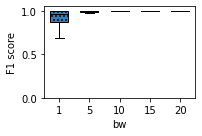

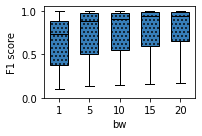

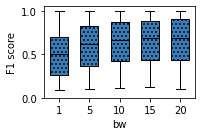

In [3]:
def vary_bw(dataset_name, method):
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    bw_values = [1, 5, 10, 15, 20]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for bw in bw_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-bw_{}".format(bw))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)
    
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("bw: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(bw, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = ax.boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    
    ax.set(xlabel="bw", ylabel="F1 score")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(range(0, len(bw_values), 1), bw_values)
    
#     plt.title("dataset: {}, method: {}".format(dataset_name, method))
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_bw.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_bw("synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40", "vocal_postgres-topk")
vary_bw("synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", "vocal_postgres-topk")
vary_bw("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40", "vocal_postgres-topk")

Easy
bw: 1, # data: 200, f1_median: 0.968, f1_IQR: 0.125, f1_mean: 0.891, runtime_median: 929.0
bw: 5, # data: 200, f1_median: 0.998, f1_IQR: 0.01, f1_mean: 0.974, runtime_median: 2011.0
bw: 10, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.985, runtime_median: 1516.0
bw: 15, # data: 200, f1_median: 0.999, f1_IQR: 0.002, f1_mean: 0.989, runtime_median: 4344.0
bw: 20, # data: 200, f1_median: 0.999, f1_IQR: 0.002, f1_mean: 0.994, runtime_median: 5446.0
Medium
bw: 1, # data: 200, f1_median: 0.736, f1_IQR: 0.504, f1_mean: 0.639, runtime_median: 1162.0
bw: 5, # data: 200, f1_median: 0.878, f1_IQR: 0.472, f1_mean: 0.739, runtime_median: 2466.0
bw: 10, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1556.0
bw: 15, # data: 200, f1_median: 0.937, f1_IQR: 0.384, f1_mean: 0.794, runtime_median: 5031.0
bw: 20, # data: 200, f1_median: 0.939, f1_IQR: 0.338, f1_mean: 0.807, runtime_median: 6436.0
Hard
bw: 1, # data: 200, f1_median: 0.499, f1_IQR: 0.431, f1_mea

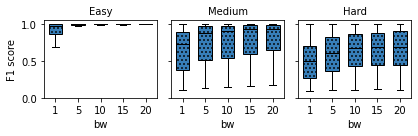

In [2]:
method = "vocal_postgres-topk"
dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
    "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
    "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                ]
short_names = ["Easy", "Medium", "Hard"]

fig, axs = plt.subplots(1, len(dataset_names), figsize = (6, 2))
                 
bw_values = [1, 5, 10, 15, 20]
handles_f1 = []
handles_runtime = []
legend_labels = []

for column_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
    print(short_name)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
                 
    f1_data = []
    runtime_data = []
    for bw in bw_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-bw_{}".format(bw))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)


        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("bw: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(bw, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[column_idx].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    
    axs[column_idx].set(xlabel="bw", ylabel="F1 score")
    axs[column_idx].set_ylim(bottom=0, top=1.05)
    axs[column_idx].set_xticks(range(0, len(bw_values), 1), bw_values)
    axs[column_idx].set_title(short_name, fontsize=10)
    
for ax in axs.flat:
    ax.label_outer()
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.savefig("figures/vary_bw.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

easy
k: 1, # data: 200, f1_median: 0.997, f1_mean:0.982, runtime_median: 2272.0
k: 10, # data: 200, f1_median: 0.998, f1_mean:0.983, runtime_median: 2306.0
k: 100, # data: 200, f1_median: 0.998, f1_mean:0.989, runtime_median: 2351.0
k: 1000, # data: 200, f1_median: 0.998, f1_mean:0.985, runtime_median: 1516.0
medium
k: 1, # data: 200, f1_median: 0.89, f1_mean:0.753, runtime_median: 2716.0
k: 10, # data: 200, f1_median: 0.912, f1_mean:0.763, runtime_median: 2747.0
k: 100, # data: 200, f1_median: 0.901, f1_mean:0.758, runtime_median: 2897.0
k: 1000, # data: 200, f1_median: 0.911, f1_mean:0.766, runtime_median: 1556.0
hard
k: 1, # data: 200, f1_median: 0.614, f1_mean:0.612, runtime_median: 1392.0
k: 10, # data: 200, f1_median: 0.582, f1_mean:0.601, runtime_median: 1388.0
k: 100, # data: 200, f1_median: 0.661, f1_mean:0.635, runtime_median: 1386.0
k: 1000, # data: 200, f1_median: 0.67, f1_mean:0.624, runtime_median: 1668.0


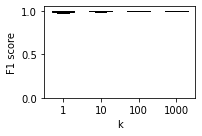

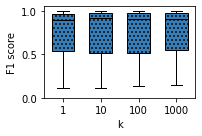

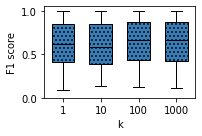

In [3]:
def vary_k(dataset_name, short_name, method):
    print(short_name)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    k_values = [1, 10, 100, 1000]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for k_value in k_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-k_{}".format(k_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("k: {}, # data: {}, f1_median: {}, f1_mean:{}, runtime_median: {}".format(k_value, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = ax.boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    
    ax.set(xlabel="k", ylabel="F1 score")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(range(0, len(k_values), 1), k_values)
    
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_k.pdf", bbox_inches='tight', pad_inches=0, dpi=600)


vary_k("synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40", "easy", "vocal_postgres-topk")
vary_k("synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", "medium", "vocal_postgres-topk")
vary_k("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40", "hard", "vocal_postgres-topk")

Easy
k_value: 1, # data: 200, f1_median: 0.997, f1_IQR: 0.01, f1_mean: 0.982, runtime_median: 2272.0
k_value: 10, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.983, runtime_median: 2306.0
k_value: 100, # data: 200, f1_median: 0.998, f1_IQR: 0.002, f1_mean: 0.989, runtime_median: 2351.0
k_value: 1000, # data: 200, f1_median: 0.998, f1_IQR: 0.003, f1_mean: 0.985, runtime_median: 1516.0
Medium
k_value: 1, # data: 200, f1_median: 0.89, f1_IQR: 0.433, f1_mean: 0.753, runtime_median: 2716.0
k_value: 10, # data: 200, f1_median: 0.912, f1_IQR: 0.459, f1_mean: 0.763, runtime_median: 2747.0
k_value: 100, # data: 200, f1_median: 0.901, f1_IQR: 0.464, f1_mean: 0.758, runtime_median: 2897.0
k_value: 1000, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1556.0
Hard
k_value: 1, # data: 200, f1_median: 0.614, f1_IQR: 0.435, f1_mean: 0.612, runtime_median: 1392.0
k_value: 10, # data: 200, f1_median: 0.582, f1_IQR: 0.455, f1_mean: 0.601, runtime_median: 1388.0
k_

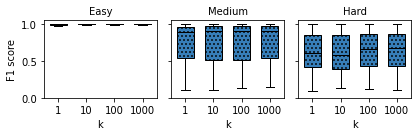

In [6]:
method = "vocal_postgres-topk"
dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
    "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
    "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                ]
short_names = ["Easy", "Medium", "Hard"]

fig, axs = plt.subplots(1, len(dataset_names), figsize = (6, 2))
                 
k_values = [1, 10, 100, 1000]
handles_f1 = []
handles_runtime = []
legend_labels = []

for column_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
    print(short_name)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
                 
    f1_data = []
    runtime_data = []
    for k_value in k_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-k_{}".format(k_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)


        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("k_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(k_value, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[column_idx].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    
    axs[column_idx].set(xlabel="k", ylabel="F1 score")
    axs[column_idx].set_ylim(bottom=0, top=1.05)
    axs[column_idx].set_xticks(range(0, len(k_values), 1), k_values)
    axs[column_idx].set_title(short_name, fontsize=10)
    
for ax in axs.flat:
    ax.label_outer()
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.savefig("figures/vary_k.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

Easy
with active learning
init_example: 5, # data: 200, f1_median: 0.948, f1_IQR: 0.262, f1_mean: 0.818, runtime_median: 1018.0
init_example: 10, # data: 200, f1_median: 0.997, f1_IQR: 0.024, f1_mean: 0.957, runtime_median: 977.0
init_example: 15, # data: 200, f1_median: 0.997, f1_IQR: 0.039, f1_mean: 0.965, runtime_median: 885.0
init_example: 20, # data: 200, f1_median: 0.997, f1_IQR: 0.04, f1_mean: 0.972, runtime_median: 848.0
without active learning
init_example: 5, # data: 200, f1_median: 0.732, f1_IQR: 0.306, f1_mean:0.696, runtime_median: 918.0
init_example: 10, # data: 200, f1_median: 0.842, f1_IQR: 0.182, f1_mean:0.817, runtime_median: 923.0
init_example: 15, # data: 200, f1_median: 0.86, f1_IQR: 0.19, f1_mean:0.835, runtime_median: 856.0
init_example: 20, # data: 200, f1_median: 0.866, f1_IQR: 0.159, f1_mean:0.846, runtime_median: 823.0
Medium
with active learning
init_example: 5, # data: 200, f1_median: 0.427, f1_IQR: 0.486, f1_mean: 0.489, runtime_median: 992.0
init_example:

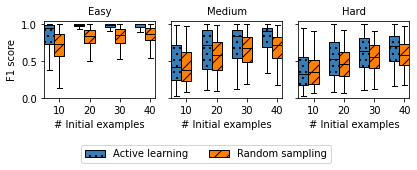

In [8]:
def with_and_without_active_learning():
    dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                    ]
    short_names = ["Easy", "Medium", "Hard"]
    fig, axs = plt.subplots(1, len(dataset_names), figsize = (6, 2))
    budget = 50
#     fig, axs = plt.subplots(1, len(budgets), figsize = (6, 2))
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    init_examples = [5, 10, 15, 20]
    
    for column_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
        print(short_name)
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
        legend_labels = []
        # With active learning
        print("with active learning")
        f1_data = []
        runtime_data = []
        for init_example in init_examples:
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk-init_{}-budget_{}".format(init_example, budget))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    f1.extend(stats["score_median"])
                    runtime.extend(stats["runtime"])
                except:
                    pass

            f1 = np.array(f1)
            runtime = np.array(runtime)

            f1_slice = f1[:, 0]
            runtime_slice = runtime[:, 0]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("init_example: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(init_example, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
            if np.all(runtime_slice == -1):
                runtime_slice = np.zeros_like(runtime_slice)
            else:
                runtime_slice[runtime_slice == -1] = np.nan
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[column_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data)))*3-1, 
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '..'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        legend_labels.append("Active learning")


        # Without active learning
        print("without active learning")
        f1_data = []
        runtime_data = []
        for init_example in init_examples:
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", "vocal_postgres_no_active_learning-topk-init_{}-budget_{}".format(init_example, budget))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    f1.extend(stats["score_median"])
                    runtime.extend(stats["runtime"])
                except:
                    pass

            f1 = np.array(f1)
            runtime = np.array(runtime)

            f1_slice = f1[:, 0]
            runtime_slice = runtime[:, 0]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("init_example: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean:{}, runtime_median: {}".format(init_example, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
            if np.all(runtime_slice == -1):
                runtime_slice = np.zeros_like(runtime_slice)
            else:
                runtime_slice[runtime_slice == -1] = np.nan
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[column_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data)))*3, 
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[1], hatch = '//'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        legend_labels.append("Random sampling")    
    
        axs[column_idx].set(xlabel="# Initial examples", ylabel="F1 score")
        axs[column_idx].set_ylim(bottom=0, top=1.05)
        axs[column_idx].set_xticks(range(0, len(init_examples)*3, 3), np.array(init_examples)*2)
        axs[column_idx].set_title(short_name, fontsize=10)
    
    for ax in axs.flat:
        ax.label_outer()
    fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=2)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/active_learning.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

with_and_without_active_learning()

In [37]:
dataset_name = "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk-init_20-budget_50")
within_queries_list = []
all_f1 = []
sample_means = []
sample_variances = []
test_list = []
for filename in os.listdir(dir_name):
    try:
        with open(os.path.join(dir_name, filename), "r") as f:
            stats = json.load(f)
        f1 = stats["score_median"]
        f1 = np.array(f1)
        f1 = f1[:, 0]
        f1[f1 == -1] = np.nan
        all_f1.extend(f1)
        variance = np.nanvar(f1)
        sample_variance = np.nanvar(f1, ddof=1)
        median = np.nanmedian(f1)
        mean = np.nanmean(f1)
        within_queries = variance / median
#         print(np.round(variance, 3), np.round(median, 3))
        test_list.append([variance, median])
        print(variance, median)
        within_queries_list.append(within_queries)
        sample_means.append(mean)
        sample_variances.append(sample_variance)
    except:
        pass
test_list = sorted(test_list, key=lambda x: x[1])
for variance, median in test_list: 
    print(np.round(variance, 3), np.round(median, 3))

between_queries = np.nanvar(all_f1) / np.nanmedian(all_f1)
print("[within queries] median: {}, mean: {}, max: {}, min: {}, q3: {}, q1: {}".format(
    np.median(within_queries_list), np.mean(within_queries_list), np.max(within_queries_list), 
    np.min(within_queries_list), np.percentile(within_queries_list, 75), np.percentile(within_queries_list, 25)))
print("between queries", between_queries)

sample_means = np.array(sample_means)
sample_variances = np.array(sample_variances)
ssb = 5*np.sum(np.square(sample_means-np.mean(all_f1)))
msb = ssb / 39
ssw = 4*np.sum(sample_variances)
msw = ssw / 160
f_statistic = msb / msw 
print("F", f_statistic)

0.003939009613774107 0.7294303797468356
0.007181688486159713 0.6418958684819712
0.019874568410090568 0.6610169491525424
0.0394209967813612 1.0
0.00041315893058696177 0.7434011250540891
0.06338639701194265 0.3825769113615596
0.01849412739578844 0.5116056362774446
0.05280000045221982 0.24520092142308678
0.0019312851410522697 0.8659793814432989
0.020721405846423218 0.8776458440887971
0.00989853042422687 0.7057837384744342
0.0026358018518585873 0.6388261851015801
0.026337701499756318 0.6050019849146487
0.052978284118276986 0.4514991181657848
0.00010203564712469738 0.18128184499865915
0.04122609889060512 0.4048456428292302
0.009545556080933708 0.7954716981132074
0.03655989999393379 0.7619934792734047
0.023530811304648017 0.6328358208955224
0.0292430025287616 0.8211382113821137
0.03769437103120714 0.7650208209399166
0.02952143188515851 0.703030303030303
0.014646108383908502 0.5286697247706421
0.009442139184308135 0.5685667736027361
0.11508841580299829 0.32242424242424245
0.02966600640478049 

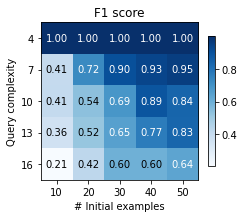

In [9]:
def complexity_cost(program):
#     a1 = 1
#     a2 = 1
#     a3 = 0.1
    a1 = 1
    a2 = 0.9
    a3 = 0.2
    duration_unit = 5
    cost_npred = sum([a1*len(dict["scene_graph"]) for dict in program])
    cost_duration = sum([(dict["duration_constraint"] // duration_unit) * (a2 + a3 * len(dict["scene_graph"])) for dict in program])
    return cost_npred + cost_duration

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def heatmap():
    # complexity: [5, 17]
#     complexity_values = list(range(2, 15))
    bins = np.array([4, 7, 10, 13, 16])
    init_examples = [5, 10, 15, 20, 25]

    heatmap_f1 = np.empty((len(bins), len(init_examples)), dtype=object)
    for i in range(heatmap_f1.shape[0]):
        for j in range(heatmap_f1.shape[1]):
            heatmap_f1[i, j] = []

    heatmap_runtime = np.empty((len(bins), len(init_examples)), dtype=object)
    for i in range(heatmap_runtime.shape[0]):
        for j in range(heatmap_runtime.shape[1]):
            heatmap_runtime[i, j] = []
    
    heatmap_count = np.zeros((len(bins), len(init_examples)))
            
    for dataset_name in ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"]:
        
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/"

        

        f1_data = []
        runtime_data = []
        for init_idx, init_example in enumerate(init_examples):
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, dataset_name, "stats", "vocal_postgres-topk-init_{}-budget_100".format(init_example))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    query_str = filename[:-5]
                    program = str_to_program_postgres(query_str)
                    complexity = complexity_cost(program)
                    complexity_idx = np.digitize(complexity, bins)
                    heatmap_f1[complexity_idx-1, init_idx].extend(stats["score_median"])                    
                    heatmap_runtime[complexity_idx-1, init_idx].extend(stats["runtime"])
                except:
                    pass
    
    for i in range(heatmap_f1.shape[0]):
        for j in range(heatmap_f1.shape[1]):
            if len(heatmap_f1[i, j]):
                heatmap_f1[i, j] = np.array(heatmap_f1[i, j])
                heatmap_f1[i, j] = heatmap_f1[i, j][:, 0]
                if np.all(heatmap_f1[i, j] == -1):
                    heatmap_f1[i, j] = np.zeros_like(heatmap_f1[i, j])
                else:
                    heatmap_f1[i, j][heatmap_f1[i, j] == -1] = np.nan
                heatmap_count[i, j] = np.count_nonzero(~np.isnan(heatmap_f1[i, j]))
                heatmap_f1[i, j] = np.round(np.nanmedian(heatmap_f1[i, j]), 3)
            else:
                heatmap_f1[i, j] = np.nan
            if len(heatmap_runtime[i, j]):
                heatmap_runtime[i, j] = np.array(heatmap_runtime[i, j])
                heatmap_runtime[i, j] = heatmap_runtime[i, j][:, 0]
                if np.all(heatmap_runtime[i, j] == -1):
                    heatmap_runtime[i, j] = np.zeros_like(heatmap_runtime[i, j])
                else:
                    heatmap_runtime[i, j][heatmap_runtime[i, j] == -1] = np.nan
                heatmap_runtime[i, j] = np.round(np.nanmedian(heatmap_runtime[i, j]), 3)
            else:
                heatmap_runtime[i, j] = np.nan
    heatmap_f1 = heatmap_f1.astype(float)
    heatmap_runtime = heatmap_runtime.astype(float)
    
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
    # F1 score
    im = ax.imshow(heatmap_f1, cmap="Blues")
    cbar = ax.figure.colorbar(im, ax = ax, shrink=0.6)
    texts = annotate_heatmap(im, valfmt="{x:.2f}")
    ax.set_xticks(np.arange(len(init_examples)), 
                  labels=np.array(init_examples)*2)
    ax.set_yticks(np.arange(len(bins)),
                  labels=bins)
    ax.set(xlabel="# Initial examples", ylabel="Query complexity")
    ax.title.set_text("F1 score")
    # Count 
#     im = axs[1].imshow(heatmap_count, cmap="Blues")
#     cbar = axs[1].figure.colorbar(im, ax = axs[1], shrink=1.0)
#     texts = annotate_heatmap(im, valfmt="{x:.0f}")
#     axs[1].set_xticks(np.arange(len(init_examples)), 
#                   labels=init_examples)
#     axs[1].set_yticks(np.arange(len(bins)),
#                   labels=bins)
#     axs[1].set(xlabel="# init examples", ylabel="Complexity")
#     axs[1].title.set_text("Run count")
#     # Runtime
#     im = axs[2].imshow(heatmap_runtime, cmap="Blues")
#     cbar = axs[2].figure.colorbar(im, ax = axs[2], shrink=1.0)
#     texts = annotate_heatmap(im, valfmt="{x:.0f}")
#     axs[2].set_xticks(np.arange(len(init_examples)), 
#                   labels=init_examples)
#     axs[2].set_yticks(np.arange(len(complexity_values)),
#                   labels=complexity_values)
#     axs[2].set(xlabel="# init examples", ylabel="Complexity")
#     axs[2].title.set_text("Runtime (s)")

#     for ax in axs.flat:
#         ax.label_outer()
    fig.tight_layout()
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(heatmap_f1, annot=True, cmap="crest", square=True)
    plt.savefig("figures/heatmap.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

heatmap()

cpu: 1, f1_median: 0.642, runtime_median: 40.0
39.84961889783541
cpu: 2, f1_median: 0.642, runtime_median: 23.0
23.127242465813957
cpu: 4, f1_median: 0.642, runtime_median: 15.0
15.228379527727762
cpu: 8, f1_median: 0.642, runtime_median: 13.0
13.146200734376908


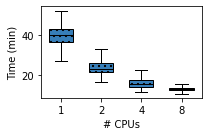

In [5]:
def vary_cpu(dataset_name, method):
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    cpu_values = [1, 2, 4, 8]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for cpu_value in cpu_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-cpu_{}-budget_50".format(cpu_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)/60.0
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("cpu: {}, f1_median: {}, runtime_median: {}".format(cpu_value, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
        print(np.median(runtime_slice))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
        
#     bp_f1 = axs[0].boxplot(f1_data, 
#                    positions=np.array(range(len(f1_data))), 
#                    sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
#                    medianprops = dict(color='black'))   
    bp_runtime = ax.boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '..'),
                   medianprops = dict(color='black'))   
#     handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    
#     axs[0].set(xlabel="#cpu", ylabel="F1 score")
#     axs[0].set_ylim(bottom=0, top=1)
#     axs[0].set_xticks(range(0, len(cpu_values), 1), cpu_values)
    
    ax.set(xlabel="# CPUs", ylabel="Time (min)")
#     ax.set_ylim(bottom=1000, top=6000)
#     ax.set_yscale('log')
    ax.set_xticks(range(0, len(cpu_values), 1), cpu_values)
    
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/vary_cpu.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_cpu("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40", "vocal_postgres-topk")

synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40 None
lambda_value: 0.0, # data: 200, f1_median: 0.634, f1_IQR: 0.444, f1_mean: 0.623, runtime_median: 1580.0
lambda_value: 0.001, # data: 200, f1_median: 0.67, f1_IQR: 0.442, f1_mean: 0.624, runtime_median: 1510.0
lambda_value: 0.01, # data: 200, f1_median: 0.679, f1_IQR: 0.419, f1_mean: 0.624, runtime_median: 1538.0
lambda_value: 0.1, # data: 200, f1_median: 0.238, f1_IQR: 0.146, f1_mean: 0.257, runtime_median: 1157.0
synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40 None
lambda_value: 0.0, # data: 200, f1_median: 0.915, f1_IQR: 0.401, f1_mean: 0.767, runtime_median: 1614.0
lambda_value: 0.001, # data: 200, f1_median: 0.911, f1_IQR: 0.434, f1_mean: 0.766, runtime_median: 1576.0
lambda_value: 0.01, # data: 200, f1_median: 0.917, f1_IQR: 0.362, f1_mean: 0.784, runtime_median: 1585.0
lambda_value: 0.1, # data: 200, f1_median: 0.271, f1_IQR: 0.177, f1_mean: 0.315, runtime_median: 1207.0
synthetic_scene_graph_with

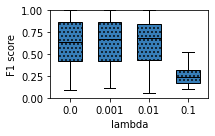

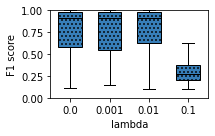

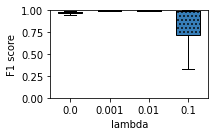

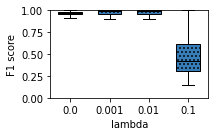

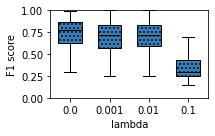

In [2]:
def vary_lambda(dataset_name, method, budget=None):
    print(dataset_name, budget)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    lambda_values = [0.0, 0.001, 0.01, 0.1]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for lambda_value in lambda_values:
        f1 = []
        runtime = []
        if budget:
            dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}-budget_{}".format(lambda_value, budget))
        else:
            dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}".format(lambda_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("lambda_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}, runtime_median: {}".format(lambda_value, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = ax.boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    
    ax.set(xlabel="lambda", ylabel="F1 score")
    ax.set_ylim(bottom=0, top=1)
    ax.set_xticks(range(0, len(lambda_values), 1), lambda_values)
    
#     plt.title("dataset: {}, method: {}".format(dataset_name, method))
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_lambda.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_lambda("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40", "vocal_postgres-topk")
vary_lambda("synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", "vocal_postgres-topk")
vary_lambda("synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40", "vocal_postgres-topk")
vary_lambda("synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40", "vocal_postgres-topk", 50)
vary_lambda("synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40", "vocal_postgres-topk", 30)

lambda_value: 0.0, # data: 20, f1_median: 0.958, f1_IQR: 0.169, f1_mean: 0.898
lambda_value: 0.0, # data: 20, f1_median: 0.698, f1_IQR: 0.176, f1_mean: 0.691
lambda_value: 0.0, # data: 20, f1_median: 0.926, f1_IQR: 0.114, f1_mean: 0.867
lambda_value: 0.0, # data: 20, f1_median: 0.832, f1_IQR: 0.153, f1_mean: 0.806
lambda_value: 0.0, # data: 20, f1_median: 0.994, f1_IQR: 0.003, f1_mean: 0.964
lambda_value: 0.0, # data: 20, f1_median: 0.777, f1_IQR: 0.159, f1_mean: 0.784
lambda_value: 0.0, # data: 20, f1_median: 0.943, f1_IQR: 0.025, f1_mean: 0.933
lambda_value: 0.0, # data: 20, f1_median: 0.887, f1_IQR: 0.209, f1_mean: 0.821
lambda_value: 0.0, # data: 20, f1_median: 0.88, f1_IQR: 0.194, f1_mean: 0.831
lambda_value: 0.0, # data: 20, f1_median: 0.488, f1_IQR: 0.326, f1_mean: 0.528
lambda_value: 0.0, # data: 20, f1_median: 0.805, f1_IQR: 0.326, f1_mean: 0.71
lambda_value: 0.0, # data: 20, f1_median: 0.59, f1_IQR: 0.506, f1_mean: 0.604
lambda_value: 0.001, # data: 20, f1_median: 1.0, f1_IQR

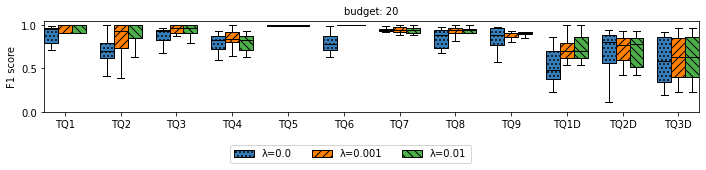

In [20]:
def vary_lambda_trajectories(method, budget):
    dataset_names = ["trajectories_handwritten"] * 9 + ["trajectories_duration"] * 3
    query_strs = ["Conjunction(Near_1(o0, o1), BottomQuadrant(o0))",
                "Far_3(o0, o1); Near_1(o0, o1); Far_3(o0, o1)",
                "Far_3(o0, o1); Conjunction(Near_1(o0, o1), Behind(o0, o1))",
                "Far_3(o0, o1); Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))",
                "Conjunction(FrontOf(o0, o1), TopQuadrant(o0))",
                "Near_1(o0, o1); Far_3(o0, o1)",
                "Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))",
                "Conjunction(Far_3(o0, o1), BottomQuadrant(o0)); Near_1(o0, o1)",
                "Conjunction(Far_3(o0, o1), LeftQuadrant(o0)); Conjunction(Near_1(o0, o1), LeftQuadrant(o0))",
                  "Duration(Far_3(o0, o1), 5); Near_1(o0, o1); Far_3(o0, o1)",
                  "Duration(LeftOf(o0, o1), 5); Conjunction(Near_1(o0, o1), TopQuadrant(o0)); Duration(RightOf(o0, o1), 5)", 
                  "Duration(Conjunction(FrontOf(o0, o1), LeftQuadrant(o0)), 15); Duration(Conjunction(Conjunction(LeftQuadrant(o0), RightOf(o0, o1)), TopQuadrant(o0)), 5)"
                 ]
    query_ids = ["TQ1", "TQ2", "TQ3", "TQ4", 'TQ5', 'TQ6', 'TQ7', 'TQ8', 'TQ9', "TQ1D", "TQ2D", "TQ3D"]
    
    fig, ax = plt.subplots(1, 1, figsize = (10, 2))
    
    lambda_values = [0.0, 0.001, 0.01]
    position_offsets = [-3, -2, -1]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    runtime_data = []
    for lambda_id, lambda_value in enumerate(lambda_values):
        f1_data = []
        for query_id, (dataset_name, query_str) in enumerate(zip(dataset_names, query_strs)): 
            exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}-budget_{}".format(lambda_value, budget))
            for run in range(20):
                try:
                    with open(os.path.join(dir_name, "{}-{}.json".format(query_str, run)), "r") as f:
                        stats = json.load(f)
                    f1.append(stats["score_median"][0][0])
                except Exception as err:
                    print(err)
                    pass
            f1 = np.array(f1)
            f1[f1 == -1] = np.nan
            f1 = f1[~np.isnan(f1)]
            print("lambda_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}".format(lambda_value, len(f1), np.round(np.median(f1), 3), np.round(np.subtract(*np.percentile(f1, [75, 25])), 3), np.round(np.mean(f1), 3)))
            f1_data.append(f1)
        bp_f1 = ax.boxplot(f1_data, 
                       positions=np.array(range(len(f1_data)))*4+position_offsets[lambda_id],
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[lambda_id], hatch = hatch_list[lambda_id]),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        legend_labels.append("\u03BB={}".format(lambda_value))

    ax.set(ylabel="F1 score")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(range(-2, len(query_strs)*4-2, 4), query_ids)
    ax.set_title("budget: {}".format(budget), fontsize=10)
    fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=3)
#     plt.title("dataset: {}, method: {}".format(dataset_name, method))
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_lambda_trajectories.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

# for i in range(12, 21):
#     print("budget: ", i)
#     vary_lambda_trajectories("vocal_postgres-topk", i)
vary_lambda_trajectories("vocal_postgres-topk", 20)

lambda_value: 0.0, # data: 200, f1_median: 0.969, f1_IQR: 0.029, f1_mean: 0.952
lambda_value: 0.0, # data: 200, f1_median: 0.842, f1_IQR: 0.424, f1_mean: 0.732
lambda_value: 0.0, # data: 200, f1_median: 0.695, f1_IQR: 0.428, f1_mean: 0.632
lambda_value: 0.001, # data: 200, f1_median: 0.997, f1_IQR: 0.039, f1_mean: 0.965
lambda_value: 0.001, # data: 200, f1_median: 0.843, f1_IQR: 0.39, f1_mean: 0.732
lambda_value: 0.001, # data: 200, f1_median: 0.642, f1_IQR: 0.401, f1_mean: 0.603
lambda_value: 0.01, # data: 200, f1_median: 0.997, f1_IQR: 0.04, f1_mean: 0.964
lambda_value: 0.01, # data: 200, f1_median: 0.841, f1_IQR: 0.383, f1_mean: 0.739
lambda_value: 0.01, # data: 199, f1_median: 0.605, f1_IQR: 0.403, f1_mean: 0.595


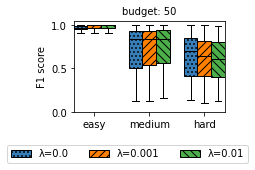

In [2]:
def vary_lambda_scene_graphs():
    budget = 50
    method = "vocal_postgres-topk"
    dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                    ]
    short_names = ['easy', 'medium', 'hard']
    
    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    lambda_values = [0.0, 0.001, 0.01]
    position_offsets = [-3, -2, -1]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    runtime_data = []
    for lambda_id, lambda_value in enumerate(lambda_values):
        f1_data = []
        for query_id, dataset_name in enumerate(dataset_names): 
            exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}-budget_{}".format(lambda_value, budget))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    f1.extend(stats["score_median"])
                except:
                    pass

            f1 = np.array(f1)
            f1_slice = f1[:, 0]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("lambda_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}".format(lambda_value, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3)))
            f1_data.append(f1_slice)

        bp_f1 = ax.boxplot(f1_data, 
                       positions=np.array(range(len(f1_data)))*4+position_offsets[lambda_id],
                       sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[lambda_id], hatch = hatch_list[lambda_id]),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        legend_labels.append("\u03BB={}".format(lambda_value))

    ax.set(ylabel="F1 score")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(range(-2, len(short_names)*4-2, 4), short_names)
    ax.set_title("budget: {}".format(budget), fontsize=10)
    fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=3)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_lambda_scene_graphs.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

# for i in range(12, 21):
#     print("budget: ", i)
#     vary_lambda_trajectories("vocal_postgres-topk", i)
vary_lambda_scene_graphs()

lambda_value: 0.0, # data: 20, f1_median: 0.958, f1_IQR: 0.169, f1_mean: 0.898
lambda_value: 0.0, # data: 20, f1_median: 0.698, f1_IQR: 0.176, f1_mean: 0.691
lambda_value: 0.0, # data: 20, f1_median: 0.926, f1_IQR: 0.114, f1_mean: 0.867
lambda_value: 0.0, # data: 20, f1_median: 0.832, f1_IQR: 0.153, f1_mean: 0.806
lambda_value: 0.0, # data: 20, f1_median: 0.994, f1_IQR: 0.003, f1_mean: 0.964
lambda_value: 0.0, # data: 20, f1_median: 0.777, f1_IQR: 0.159, f1_mean: 0.784
lambda_value: 0.0, # data: 20, f1_median: 0.943, f1_IQR: 0.025, f1_mean: 0.933
lambda_value: 0.0, # data: 20, f1_median: 0.887, f1_IQR: 0.209, f1_mean: 0.821
lambda_value: 0.0, # data: 20, f1_median: 0.88, f1_IQR: 0.194, f1_mean: 0.831
lambda_value: 0.0, # data: 20, f1_median: 0.488, f1_IQR: 0.326, f1_mean: 0.528
lambda_value: 0.0, # data: 20, f1_median: 0.805, f1_IQR: 0.326, f1_mean: 0.71
lambda_value: 0.0, # data: 20, f1_median: 0.59, f1_IQR: 0.506, f1_mean: 0.604
lambda_value: 0.001, # data: 20, f1_median: 1.0, f1_IQR

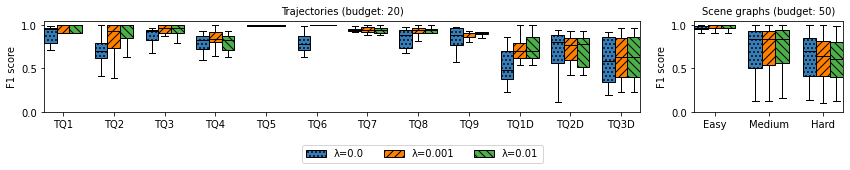

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (12, 2), gridspec_kw={'width_ratios': [4, 1]})
# trajectories
method = "vocal_postgres-topk"
budget = 20
dataset_names = ["trajectories_handwritten"] * 9 + ["trajectories_duration"] * 3
query_strs = ["Conjunction(Near_1(o0, o1), BottomQuadrant(o0))",
            "Far_3(o0, o1); Near_1(o0, o1); Far_3(o0, o1)",
            "Far_3(o0, o1); Conjunction(Near_1(o0, o1), Behind(o0, o1))",
            "Far_3(o0, o1); Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))",
            "Conjunction(FrontOf(o0, o1), TopQuadrant(o0))",
            "Near_1(o0, o1); Far_3(o0, o1)",
            "Conjunction(Conjunction(Near_1(o0, o1), LeftQuadrant(o0)), Behind(o0, o1))",
            "Conjunction(Far_3(o0, o1), BottomQuadrant(o0)); Near_1(o0, o1)",
            "Conjunction(Far_3(o0, o1), LeftQuadrant(o0)); Conjunction(Near_1(o0, o1), LeftQuadrant(o0))",
              "Duration(Far_3(o0, o1), 5); Near_1(o0, o1); Far_3(o0, o1)",
              "Duration(LeftOf(o0, o1), 5); Conjunction(Near_1(o0, o1), TopQuadrant(o0)); Duration(RightOf(o0, o1), 5)", 
              "Duration(Conjunction(FrontOf(o0, o1), LeftQuadrant(o0)), 15); Duration(Conjunction(Conjunction(LeftQuadrant(o0), RightOf(o0, o1)), TopQuadrant(o0)), 5)"
             ]
query_ids = ["TQ1", "TQ2", "TQ3", "TQ4", 'TQ5', 'TQ6', 'TQ7', 'TQ8', 'TQ9', "TQ1D", "TQ2D", "TQ3D"]

lambda_values = [0.0, 0.001, 0.01]
position_offsets = [-3, -2, -1]
handles_f1 = []
handles_runtime = []
legend_labels = []
hatch_list = ['...', '///', '\\\\\\', 'xxx']
runtime_data = []
improvements = np.zeros((len(query_strs), 3))
for lambda_id, lambda_value in enumerate(lambda_values):
    f1_data = []
    for query_id, (dataset_name, query_str) in enumerate(zip(dataset_names, query_strs)): 
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}-budget_{}".format(lambda_value, budget))
        for run in range(20):
            try:
                with open(os.path.join(dir_name, "{}-{}.json".format(query_str, run)), "r") as f:
                    stats = json.load(f)
                f1.append(stats["score_median"][0][0])
            except Exception as err:
                print(err)
                pass
        f1 = np.array(f1)
        f1[f1 == -1] = np.nan
        f1 = f1[~np.isnan(f1)]
        print("lambda_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}".format(lambda_value, len(f1), np.round(np.median(f1), 3), np.round(np.subtract(*np.percentile(f1, [75, 25])), 3), np.round(np.mean(f1), 3)))
        improvements[query_id, lambda_id] = np.median(f1)
        f1_data.append(f1)
    bp_f1 = axs[0].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data)))*4+position_offsets[lambda_id],
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[lambda_id], hatch = hatch_list[lambda_id]),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    legend_labels.append("\u03BB={}".format(lambda_value))

axs[0].set(ylabel="F1 score")
axs[0].set_ylim(bottom=0, top=1.05)
axs[0].set_xticks(range(-2, len(query_strs)*4-2, 4), query_ids)
axs[0].set_title("Trajectories (budget: {})".format(budget), fontsize=10)

for i in range(len(query_strs)):
#     print("improvement of lambda=0.001:", np.round(improvements[i][1] / improvements[i][0], 3))
    print("improvement of lambda=0.01:", np.round(100*(improvements[i][2]-improvements[i][0]) / improvements[i][0], 3))

# scene graphs 
budget = 50
method = "vocal_postgres-topk"
dataset_names = ["synthetic_scene_graph_without_duration-npred_3-nattr_pred_1-depth_1-40",
    "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2-40", 
    "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2-new-40"
                ]
short_names = ['Easy', 'Medium', 'Hard']

lambda_values = [0.0, 0.001, 0.01]
position_offsets = [-3, -2, -1]
handles_f1 = []
handles_runtime = []
legend_labels = []
hatch_list = ['...', '///', '\\\\\\', 'xxx']
runtime_data = []
improvements = np.zeros((len(dataset_names), 3))
for lambda_id, lambda_value in enumerate(lambda_values):
    f1_data = []
    for query_id, dataset_name in enumerate(dataset_names): 
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-lambda_{}-budget_{}".format(lambda_value, budget))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
            except:
                pass

        f1 = np.array(f1)
        f1_slice = f1[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        print("lambda_value: {}, # data: {}, f1_median: {}, f1_IQR: {}, f1_mean: {}".format(lambda_value, len(f1_slice), np.round(np.median(f1_slice), 3), np.round(np.subtract(*np.percentile(f1_slice, [75, 25])), 3), np.round(np.mean(f1_slice), 3)))
        improvements[query_id, lambda_id] = np.median(f1_slice)
        f1_data.append(f1_slice)

    bp_f1 = axs[1].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data)))*4+position_offsets[lambda_id],
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[lambda_id], hatch = hatch_list[lambda_id]),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    legend_labels.append("\u03BB={}".format(lambda_value))

    
axs[1].set(ylabel="F1 score")
axs[1].set_ylim(bottom=0, top=1.05)
axs[1].set_xticks(range(-2, len(short_names)*4-2, 4), short_names)
axs[1].set_title("Scene graphs (budget: {})".format(budget), fontsize=10)

for i in range(len(dataset_names)):
    print("improvement of lambda=0.001:", np.round(100*(improvements[i][1]-improvements[i][0]) / improvements[i][0], 3))
#     print("improvement of lambda=0.01:", np.round(100*(improvements[i][2]-improvements[i][0]) / improvements[i][0], 3))

    
# for ax in axs.flat:
#     ax.label_outer()
fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
          fancybox=True, shadow=False, ncol=3)
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.savefig("figures/vary_lambda.pdf", bbox_inches='tight', pad_inches=0, dpi=600)
    